<a href="https://colab.research.google.com/github/SwamyYedla/Digital-Image-Processing/blob/main/Question2_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy matplotlib pillow scipy

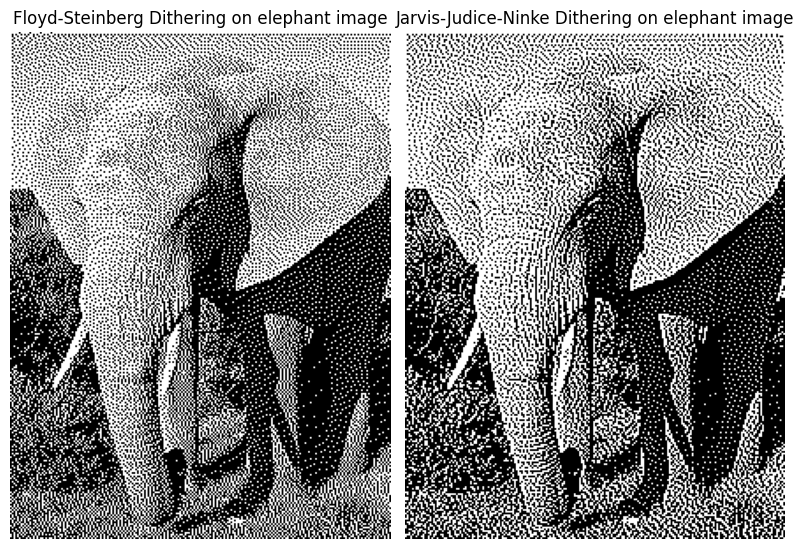

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def floyd_steinberg_dithering(image):
    gray_image = image.convert('L')
    gray_image = np.array(gray_image, dtype=np.float32)

    height, width = gray_image.shape
    dithered = np.zeros_like(gray_image, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = gray_image[y, x]
            new_pixel = 255 * (old_pixel > 127)
            dithered[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < width:
                gray_image[y, x + 1] += quant_error * 7 / 16
            if y + 1 < height:
                if x - 1 >= 0:
                    gray_image[y + 1, x - 1] += quant_error * 3 / 16
                gray_image[y + 1, x] += quant_error * 5 / 16
                if x + 1 < width:
                    gray_image[y + 1, x + 1] += quant_error * 1 / 16

    return dithered

def jarvis_dithering(image):
    gray_image = image.convert('L')
    gray_image = np.array(gray_image, dtype=np.float32)

    height, width = gray_image.shape
    dithered = np.zeros_like(gray_image, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = gray_image[y, x]
            new_pixel = 255 * (old_pixel > 127)
            dithered[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < width:
                gray_image[y, x + 1] += quant_error * 7 / 48
            if x + 2 < width:
                gray_image[y, x + 2] += quant_error * 5 / 48
            if y + 1 < height:
                if x - 2 >= 0:
                    gray_image[y + 1, x - 2] += quant_error * 3 / 48
                if x - 1 >= 0:
                    gray_image[y + 1, x - 1] += quant_error * 5 / 48
                gray_image[y + 1, x] += quant_error * 7 / 48
                if x + 1 < width:
                    gray_image[y + 1, x + 1] += quant_error * 5 / 48
                if x + 2 < width:
                    gray_image[y + 1, x + 2] += quant_error * 3 / 48
            if y + 2 < height:
                if x - 2 >= 0:
                    gray_image[y + 2, x - 2] += quant_error * 1 / 48
                if x - 1 >= 0:
                    gray_image[y + 2, x - 1] += quant_error * 3 / 48
                gray_image[y + 2, x] += quant_error * 5 / 48
                if x + 1 < width:
                    gray_image[y + 2, x + 1] += quant_error * 3 / 48
                if x + 2 < width:
                    gray_image[y + 2, x + 2] += quant_error * 1 / 48

    return dithered

# Loaing the Elephant image
image_path = 'Elephant.jpeg'
image = Image.open(image_path)

# Apply both dithering algorithms
floyd_dithered = floyd_steinberg_dithering(image)
jarvis_dithered = jarvis_dithering(image)

# Display results
plt.figure(figsize=(12, 6))


plt.subplot(1, 3, 2)
plt.imshow(floyd_dithered, cmap='gray')
plt.title('Floyd-Steinberg Dithering on elephant image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(jarvis_dithered, cmap='gray')
plt.title('Jarvis-Judice-Ninke Dithering on elephant image')
plt.axis('off')

plt.tight_layout()
plt.show()
